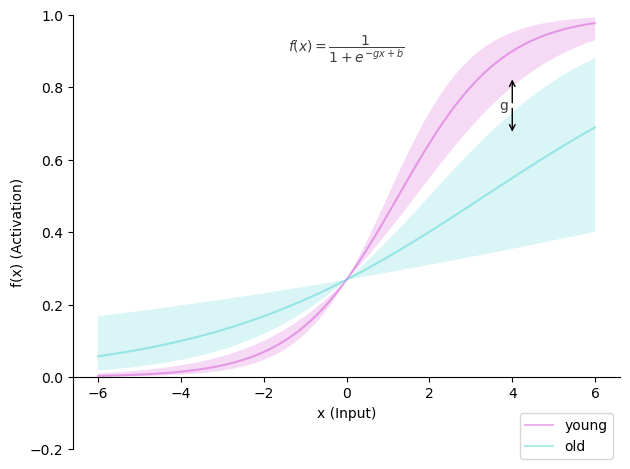

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function with a slope parameter
def sigmoid(x, g, b=-1):
    return 1 / (1 + np.exp(-(g*x+b)))

# Generate some data
x = np.linspace(-6, 6, 100)

# Set the slope parameter
g_old = [0.1, 0.3,0.5]
g_young = [0.6, 0.8, 1]

# Compute the sigmoid function with the slope parameter
young_min = sigmoid(x, g_young[0])
young_mean = sigmoid(x, g_young[1])
young_max = sigmoid(x, g_young[2])
old_min = sigmoid(x, g_old[0])
old_mean = sigmoid(x, g_old[1])
old_max = sigmoid(x, g_old[2])

# Plot the sigmoid function with the slope parameter
sigmoid(0, g_young[0])

fig, ax = plt.subplots(tight_layout=True)
ax.plot(x, young_mean, color = 'm', alpha=.3, label='young')
ax.fill_between(x, young_min, young_max, facecolor='m', alpha = .15, interpolate=True)
ax.plot(x, old_mean, color = 'c', alpha=.3, label='old')
ax.fill_between(x, old_min, old_max, facecolor='c', alpha = .15, interpolate=True)
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('f(x) (Activation)')
ax.set_xlabel('x (Input)')
ax.set_ylim([-.2,1])
ax.text(x=0,y=0.9,s=r'$f(x) =  \dfrac{1}{1 + e^{-gx+b}}$', alpha=.75, horizontalalignment='center')
ax.text(x=3.8,y=0.75,s='g', alpha=.75, horizontalalignment='center',verticalalignment='center')
ax.annotate("", xy=(4, 0.83), xytext=(4, 0.75),
            arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(4, 0.67), xytext=(4, 0.75),
            arrowprops=dict(arrowstyle="->"))
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.1))

In [ ]:
plt.plot 